In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [5]:
train = pd.read_csv('train.csv').drop(columns = "Unnamed: 0")
train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,HighQuality
0,8.8,0.240,0.35,1.7,0.055,13.0,27.0,0.99394,3.14,0.59,11.3,1
1,7.3,0.320,0.23,2.3,0.066,35.0,70.0,0.99588,3.43,0.62,10.1,0
2,9.9,0.530,0.57,2.4,0.093,30.0,52.0,0.99710,3.19,0.76,11.6,1
3,7.6,0.685,0.23,2.3,0.111,20.0,84.0,0.99640,3.21,0.61,9.3,0
4,9.0,0.600,0.29,2.0,0.069,32.0,73.0,0.99654,3.34,0.57,10.0,0


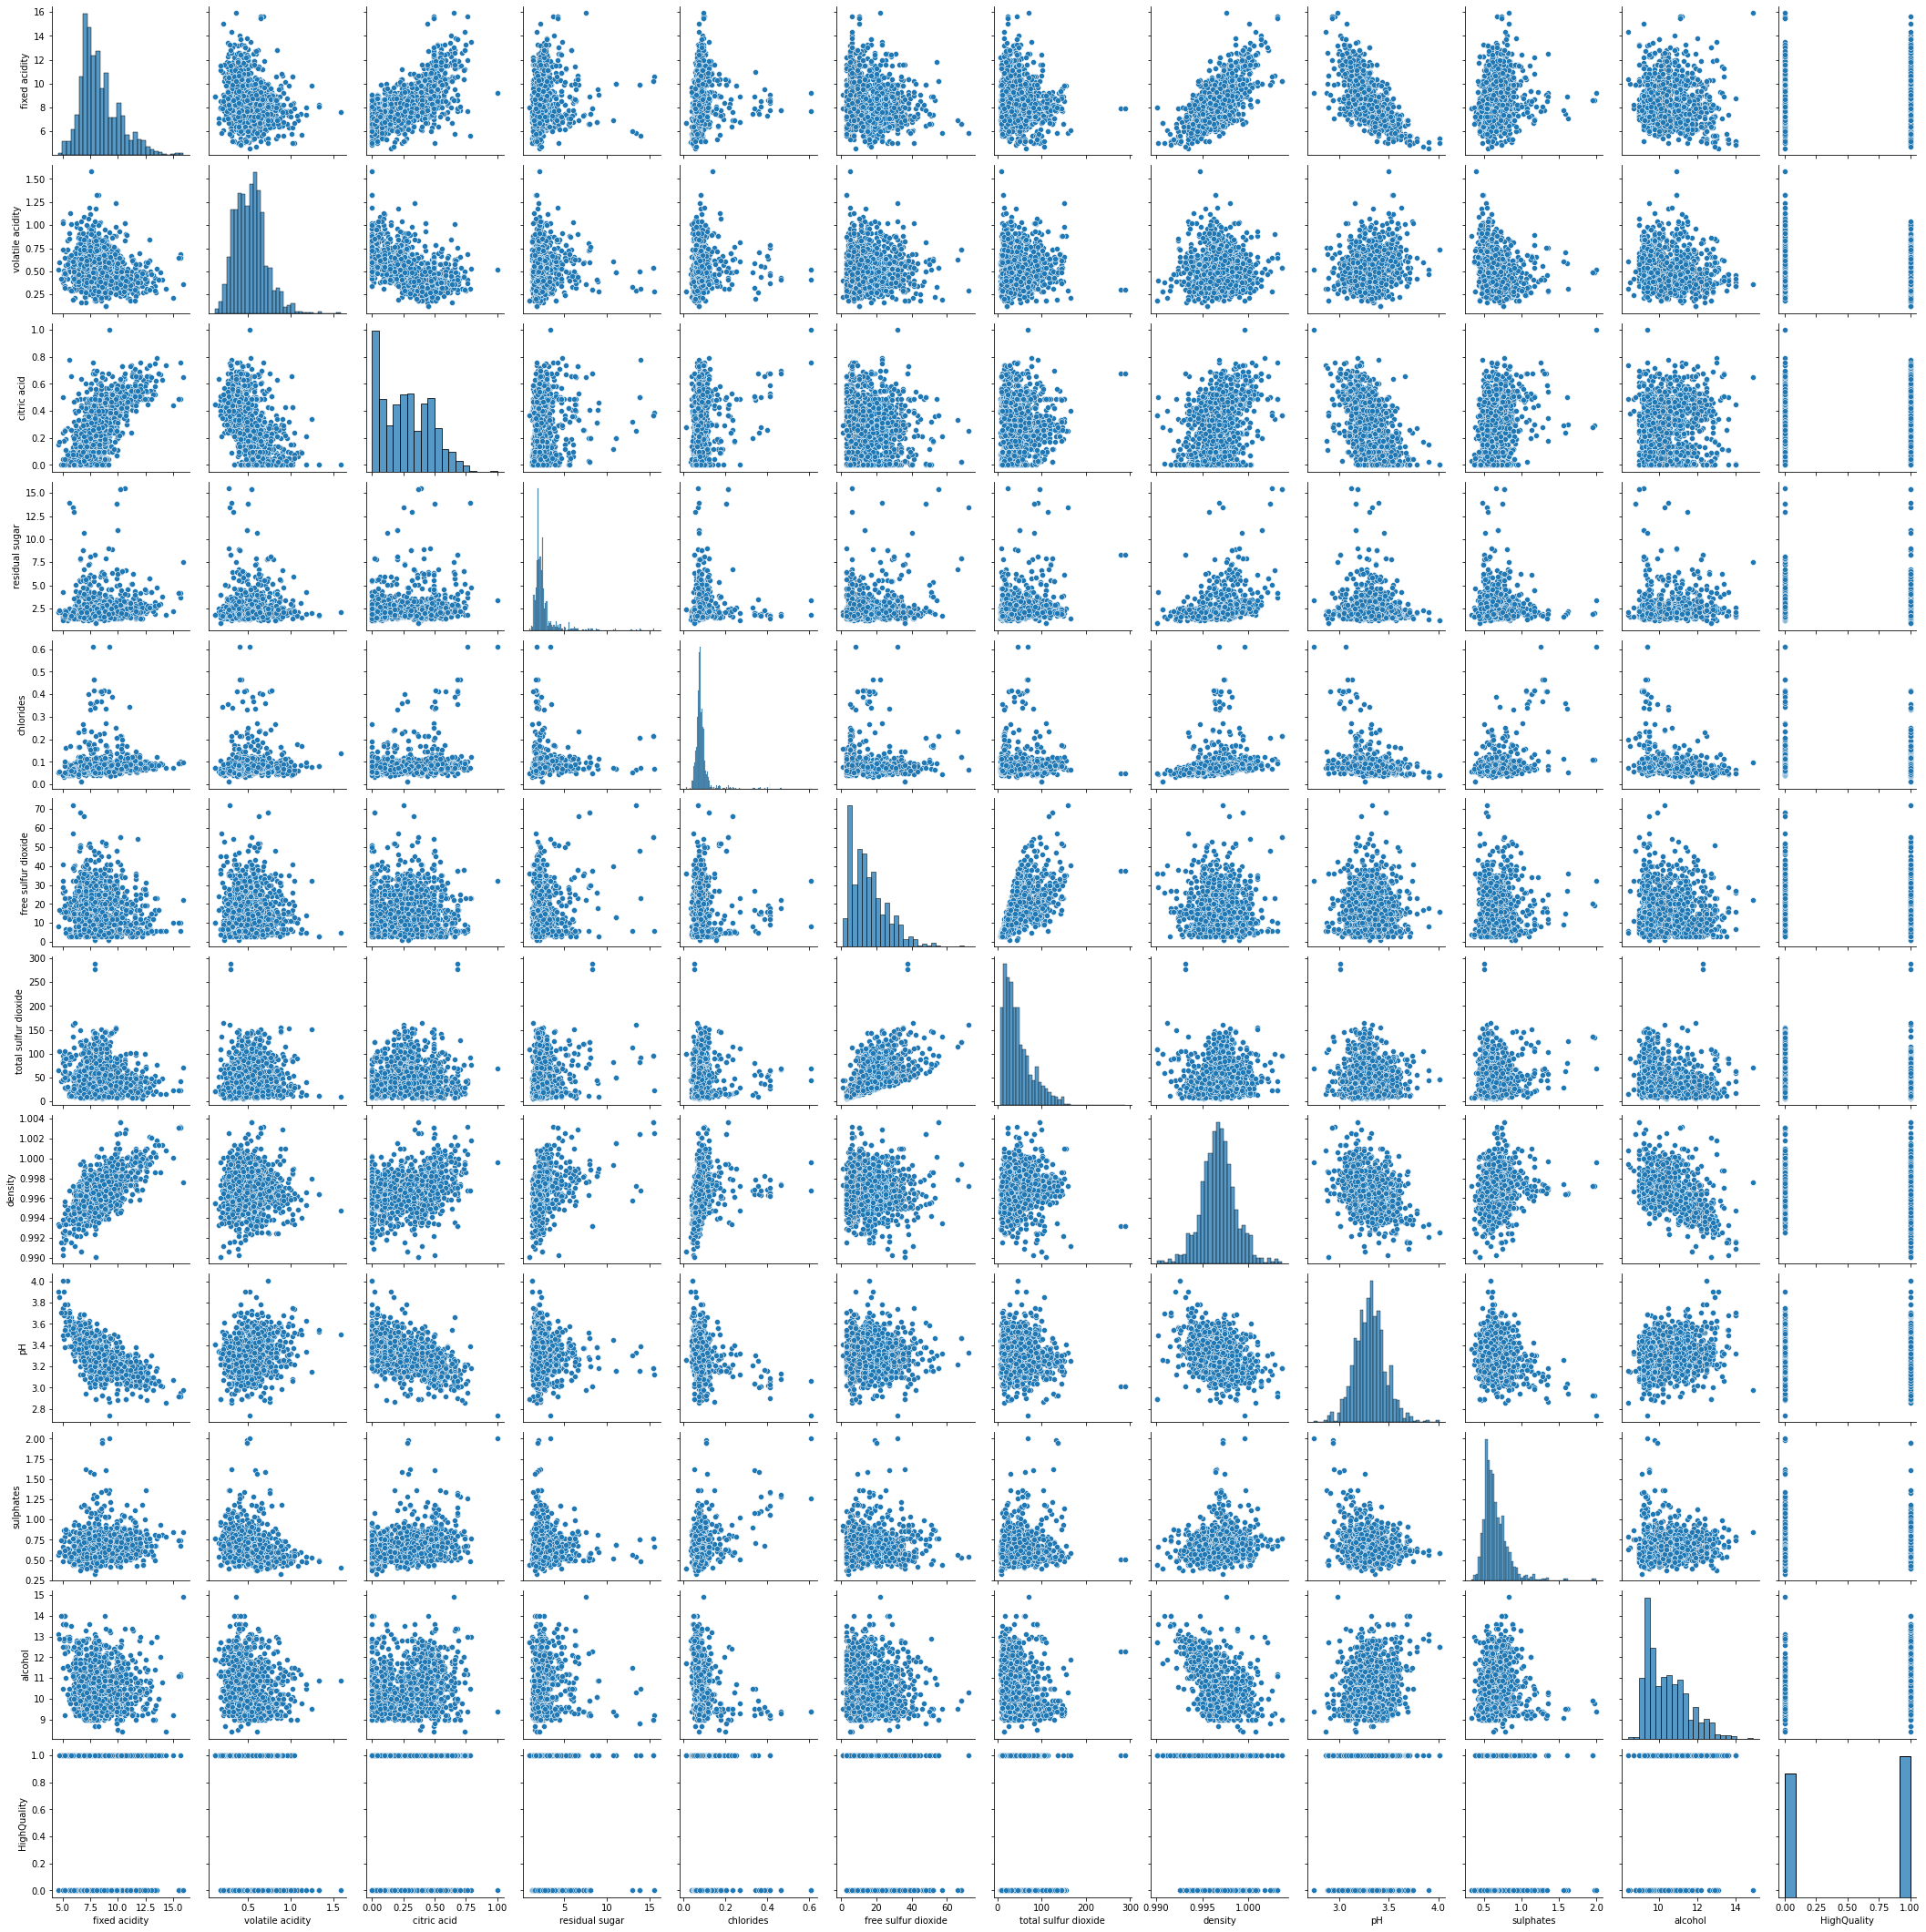

In [6]:
sns.pairplot(train)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x = train.drop(columns = ['HighQuality'])
y = train['HighQuality']

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=8)

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
lr = LogisticRegression(solver='sag', C=0.005)

In [12]:
lr.fit(x_train, y_train)

LogisticRegression(C=0.005, solver='sag')

In [13]:
preds = lr.predict(x_test)

In [14]:
(preds == y_test).sum() / len(y_test)

0.6597222222222222

In [15]:
from sklearn.metrics import f1_score

In [16]:
f1_score(y_test, preds)

0.7262569832402234

In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
penalty = ['none', 'l2']
# Create range of candidate regularization hyperparameter values C
C = [.001, .01, 1, 5, 10]

# Create dictionary hyperparameter candidates
hyperparameters = dict(C=C, penalty=penalty) 
print(hyperparameters)

{'C': [0.001, 0.01, 1, 5, 10], 'penalty': ['none', 'l2']}


In [23]:
# Create grid search, and pass in all defined values
gridsearch = GridSearchCV(lr, hyperparameters, cv=5, verbose=1) # Fit grid search
best_model = gridsearch.fit(x_train, y_train)

# best_model will automatically become the logistic regression with the best hyperparameters

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.6s finished


In [24]:
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty']) 
print('Best C:', best_model.best_estimator_.get_params()['C'])
print("The mean accuracy of the model is:",best_model.score(x_train, y_train))
print(best_model.best_estimator_)

Best Penalty: none
Best C: 0.001
The mean accuracy of the model is: 0.6429192006950478
LogisticRegression(C=0.001, penalty='none', solver='sag')


In [25]:
preds2 = best_model.predict(x_test)

In [26]:
f1_score(y_test, preds2)

0.7409470752089137

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
neigh = KNeighborsClassifier(n_neighbors=11, p=2)
neigh.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [29]:
predictions = neigh.predict(x_test)
predictions

array([1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0])

In [30]:
f1_score(y_test, predictions)

0.7151898734177214

In [32]:
test_df = pd.read_csv('test.csv').drop(columns = ['Unnamed: 0'])

In [33]:
test_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.7,0.56,0.08,2.50,0.114,14.0,46.0,0.9971,3.24,0.66,9.6
1,7.8,0.50,0.17,1.60,0.082,21.0,102.0,0.9960,3.39,0.48,9.5
2,10.7,0.67,0.22,2.70,0.107,17.0,34.0,1.0004,3.28,0.98,9.9
3,8.5,0.46,0.31,2.25,0.078,32.0,58.0,0.9980,3.33,0.54,9.8
4,6.7,0.46,0.24,1.70,0.077,18.0,34.0,0.9948,3.39,0.60,10.6


In [34]:
actual_predictions = neigh.predict(test_df)

In [35]:
preds_df = pd.DataFrame(actual_predictions).reset_index()

In [36]:
preds_df.columns = ['ID', "HighQuality"]

In [37]:
preds_df.head()

,ID,HighQuality
0,0,0
1,1,0
2,2,1
3,3,1
4,4,1


In [38]:
preds_df.to_csv("SampleSubmission2.csv", index = None)

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [40]:
clf = RandomForestClassifier(max_depth=12, random_state=8, min_samples_split=8, max_features='log2', verbose=2)
clf.fit(x_train, y_train)

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


RandomForestClassifier(max_depth=12, max_features='log2', min_samples_split=8,
                       random_state=8, verbose=2)

In [46]:
preds3 = clf.predict(x_test)
preds3

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1])

In [47]:
actual_preds3 = clf.predict(test_df)
actual_preds3
preds3_df = pd.DataFrame(actual_preds3).reset_index()
preds3_df.columns = ['ID', "HighQuality"]
preds3_df.head()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


,ID,HighQuality
0,0,0
1,1,0
2,2,0
3,3,0
4,4,1


In [48]:
f1_score(y_test, preds3)

0.8051948051948052

In [44]:
preds3_df.to_csv("SampleSubmission9.csv", index = None)